# <font color="blue"> DNP 1: Solid Effect </font>

In [3]:
import sys
sys.path.append('/Users/albertsmith/Documents/GitHub/')
import SLEEPY as sl

In [50]:
%matplotlib notebook

In [153]:
ex=sl.ExpSys(v0H=600,Nucs=['e','1H'],LF=[False,True],vr=0,T_K=80)
ex.set_inter('hyperfine',i0=0,i1=1,Axx=-1000000,Ayy=-1000000,Azz=2000000)

In [154]:
L=ex.Liouvillian()
L.add_relax(Type='T2',i=0,T2=100e-9)
L.add_relax(Type='T1',i=0,T1=1.4e-3)
L.add_relax(Type='T2',i=1,T2=10e-3)
L.add_relax(Type='recovery')

Liouvillian under the following conditions:
	2-spin system (e,1H)
	B0 = 14.092 T (600.000 MHz 1H frequency)
	rotor angle = 0.000 degrees
	rotor frequency = 0.0 kHz
	Temperature = 80 K
	Powder Average: JCP59 with 99 angles

The individual Hamiltonians have the following interactions
	Hamiltonian #0
		hyperfine between spins 0,1 with arguments:
			(Axx=-1000000,Ayy=-1000000,Azz=2000000)
	
	

Explicit relaxation
	T2 with arguments: i = 0, T2 = 1e-07
	T1 with arguments: i = 0, T1 = 0.0014
	T2 with arguments: i = 1, T2 = 0.01
	recovery


In [156]:
seq=L.Sequence()
seq.add_channel(channel='e',v1=3e6,voff=-600e6)

In [157]:
seq.plot()

<IPython.core.display.Javascript object>

TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

In [158]:
U=seq.U(Dt=1e-3)

In [159]:
rho=sl.Rho(rho0='Thermal',detect=['S0z','1Hz'])

In [160]:
rho.DetProp(U,n=2000)

Density Matrix/Detection Operator
rho0: Thermal
detect[0]: S0z
detect[1]: 1Hz
Current time is 2000000.000 microseconds
2000 time points have been recorded


<IPython.core.display.Javascript object>


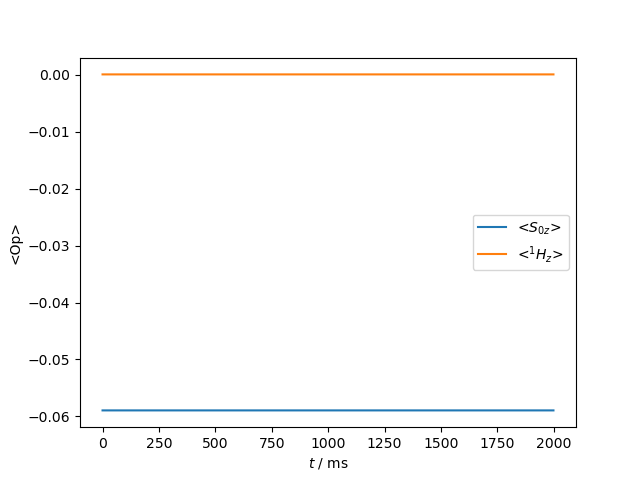

<AxesSubplot:xlabel='$t$ / ms', ylabel='<Op>'>

In [162]:
rho.plot()

In [163]:
L

Liouvillian under the following conditions:
	2-spin system (e,1H)
	B0 = 14.092 T (600.000 MHz 1H frequency)
	rotor angle = 0.000 degrees
	rotor frequency = 0.0 kHz
	Temperature = 80 K
	Powder Average: JCP59 with 99 angles

The individual Hamiltonians have the following interactions
	Hamiltonian #0
		hyperfine between spins 0,1 with arguments:
			(Axx=-1000000,Ayy=-1000000,Azz=2000000)
	
	

Explicit relaxation
	T2 with arguments: i = 0, T2 = 1e-07
	T1 with arguments: i = 0, T1 = 0.0014
	T2 with arguments: i = 1, T2 = 0.01
	recovery
